# **Task 1: Exploratory Data Analysis (EDA)**

## **Load Dataset & Inspect**

In [3]:
import pandas as pd

# load dataset
df = pd.read_csv("/kaggle/input/datasets/durgeshchungle/mushroom/mushroom.csv")

# view data
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

## **Check Missing Values**

In [4]:
print(df.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


## **Class Distribution**

In [5]:
print(df['class'].value_counts())

class
poisonous    1400
edible        600
Name: count, dtype: int64


## **Visualize Feature Distributions**

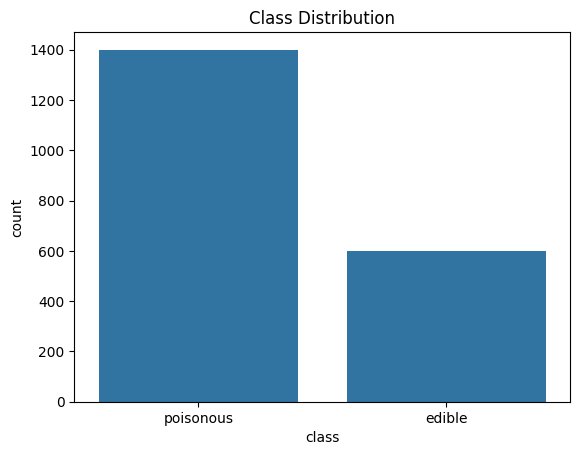

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

### **Correlation Insight (after encoding)**

### **Categorical data must be encoded first (done below)**.

# **Task 2: Data Preprocessing**

#### **Encode Categorical Variables**

#### **All features are categorical**.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

## **Split Features & Target**

In [8]:
X = df.drop('class', axis=1)
y = df['class']

## **Train-Test Split**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# **Task 3: Data Visualization**

## **Pair Plot (sample due to many features)**

In [10]:
print(df.columns)

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


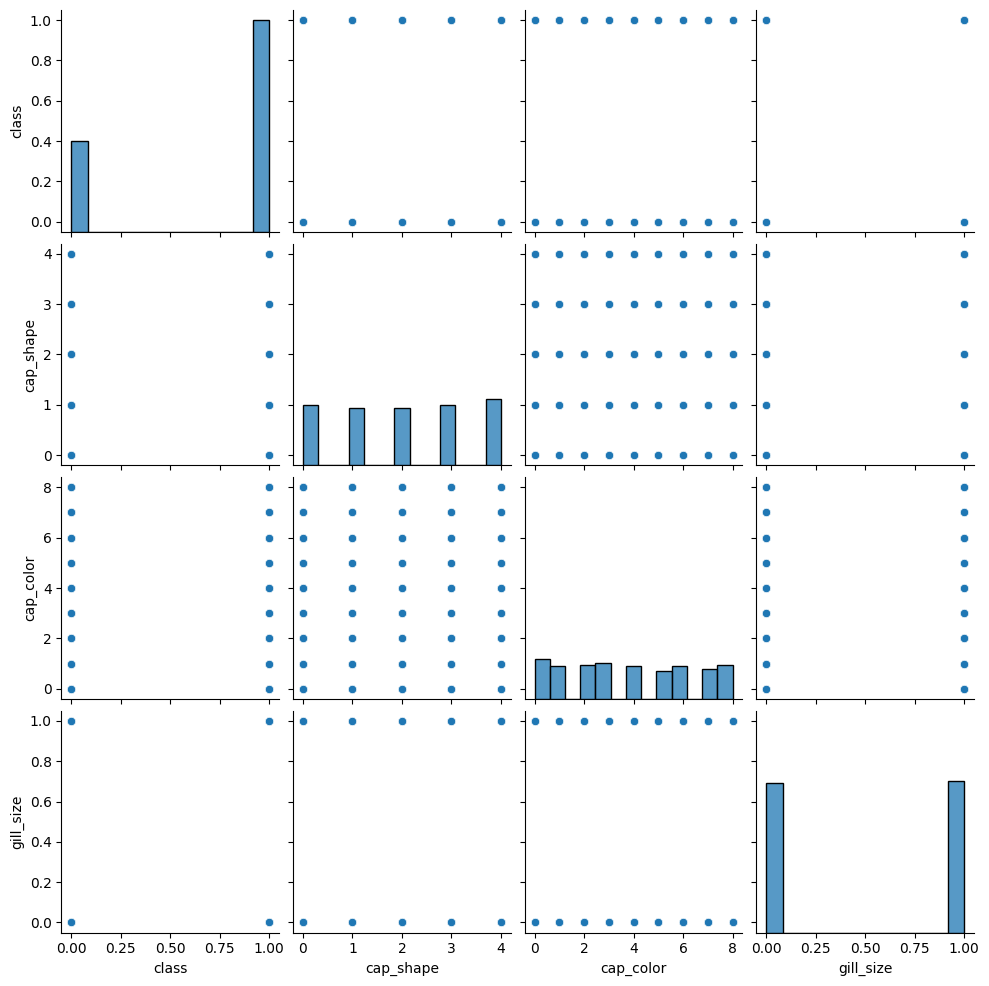

In [11]:
sns.pairplot(df[['class','cap_shape','cap_color','gill_size']])
plt.show()

## **Correlation Heatmap**

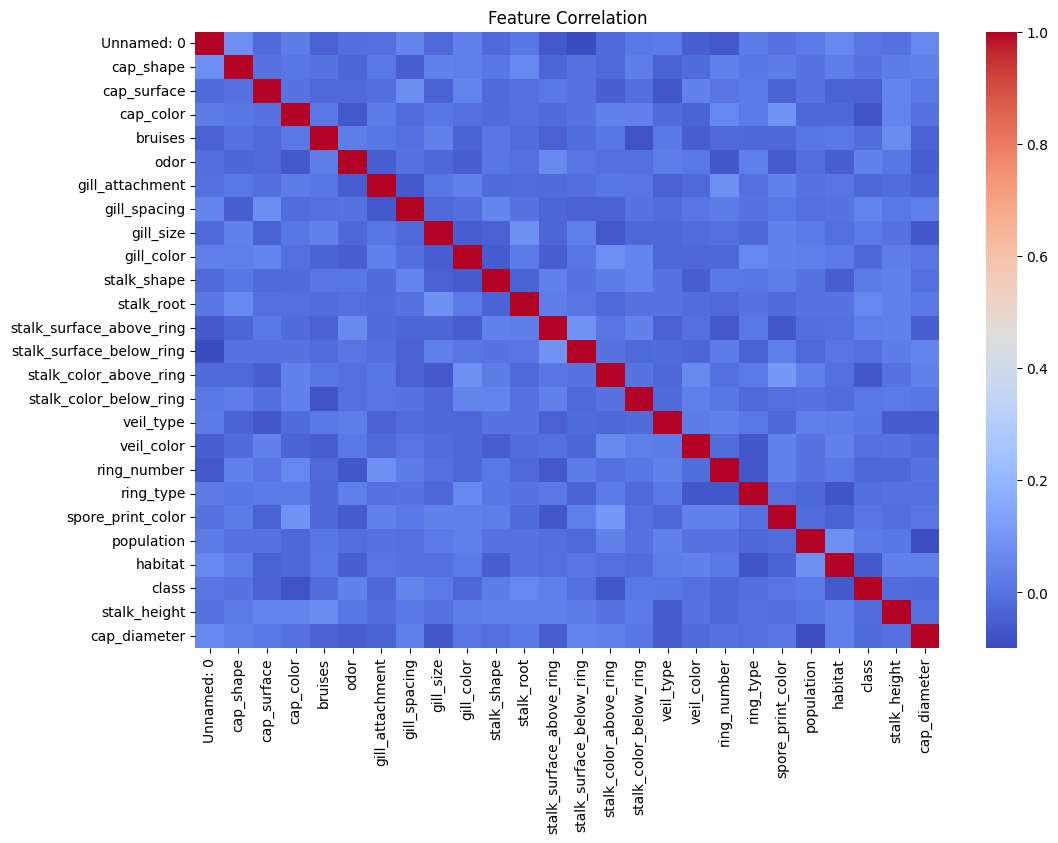

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# **Task 4: SVM Implementation**

## **Train Basic SVM Model**

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

## **Model Evaluation**

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Metrics Explained:**

Accuracy → overall correctness

Precision → poison predicted correctly

Recall → poisonous mushrooms detected

F1-score → balance between precision & recall

# **Task 5: Visualization of SVM Results**

### Since dataset has many features, we visualize using 2D projection.

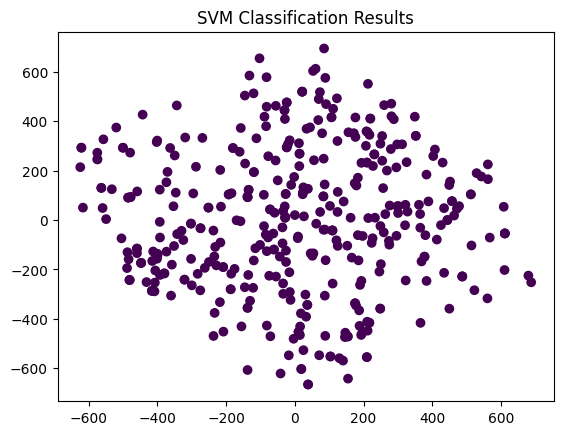

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred)
plt.title("SVM Classification Results")
plt.show()

# **Task 6: Parameter Tuning & Optimization**

## **Try Different Kernels & C Values**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# **Task 7: Comparison & Analysis**

### **Kernel Comparison**

In [15]:
kernels = ['linear', 'rbf', 'poly']

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(k, accuracy_score(y_test, pred))

linear 0.6675
rbf 0.6675
poly 0.6675


# **Strengths & Weaknesses of SVM (Mushroom Dataset)**

 
## **Strengths & Weaknesses of SVM (Mushroom Dataset) **

  ### **Strengths**

* ✔ Works well with high-dimensional categorical data
* ✔ Excellent classification accuracy
* ✔ Handles non-linear boundaries with kernels


 ### **Weaknesses**


*  Training can be slow with large datasets
*  Hard to interpret compared to decision trees
* Requires parameter tuning


 ## **Real-World Applications of SVM**

* Medical diagnosis

* Spam email detection

* Image classification

* Fraud detection

* Bioinformatics classification